In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import qqplot,add_constant
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from matplotlib import gridspec
from sklearn.metrics import confusion_matrix
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_curve,auc
import seaborn as sns

%matplotlib inline

#경고문구 무시
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rc('font',family='Malgun Gothic')

In [2]:
df = pd.read_csv('train_preprocessing_ViewRating.csv')

FileNotFoundError: File b'train_preprocessing_ViewRating.csv' does not exist

In [ ]:
train=df.drop(['상품명','방송일시','year','일시','시간'],axis=1)

train['판매량']=(train.취급액/train.판매단가).round(1)

#취급액이 null인거 제거

train=train.dropna(subset=['취급액'],axis=0)
train.isnull().sum()

In [ ]:
train.head()

In [42]:
#x,y나누기
df_y=train['판매량']
df_x=df.drop(['판매량','취급액'],axis=1,inplace=False)

#x변수 더미 처리
train['마더코드'] = pd.get_dummies(train['마더코드'])
train['상품코드'] =pd.get_dummies(train['상품코드'])
train['상품군'] = pd.get_dummies(train['상품군'])

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))



train data x size:(497, 96)
train data y size:(497,)
test data x size:(213, 96)
test data y size:(213,)



,n_estimator,TrainScore,TestScore
0,10,0.992,0.934
1,20,0.998,0.948
2,30,1.000,0.953
3,40,1.000,0.953
4,50,1.000,0.953
5,60,1.000,0.953
6,70,1.000,0.953
7,80,1.000,0.953
8,90,1.000,0.953
9,100,1.000,0.953


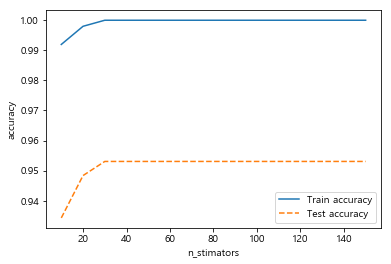

In [43]:
train_accuracy=[]
test_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]




for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimator']=para_n_tree
df_accuracy_n['TrainScore']=train_accuracy
df_accuracy_n['TestScore']=test_accuracy

display(df_accuracy_n.round(3))

plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_stimators')
plt.legend()

#n=50

,depth,TrainScore,TestScore
0,1,0.688,0.648
1,2,0.877,0.864
2,3,0.905,0.878
3,4,0.926,0.915
4,5,0.950,0.939
5,6,0.966,0.920
6,7,0.972,0.953
7,8,0.982,0.953
8,9,0.984,0.962
9,10,0.992,0.953


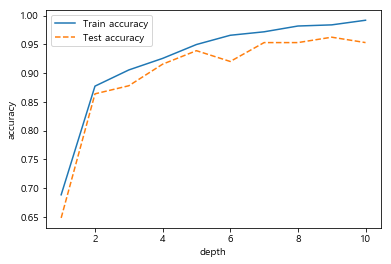

In [44]:
train_accuracy=[]
test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth,n_estimators=50,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()
#depth=4 

,split,TrainScore,TestScore
0,10,0.934,0.915
1,20,0.934,0.915
2,30,0.920,0.911
3,40,0.930,0.911
4,50,0.928,0.915
5,60,0.924,0.915
6,70,0.926,0.911
7,80,0.922,0.906
8,90,0.915,0.915
9,100,0.903,0.901


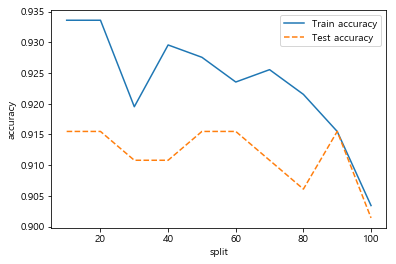

In [45]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=4,n_estimators=50,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()
# split=60

,leaf,TrainScore,TestScore
0,10,0.891,0.883
1,20,0.889,0.873
2,30,0.883,0.869
3,40,0.875,0.859
4,50,0.875,0.854
5,60,0.863,0.845
6,70,0.817,0.789
7,80,0.706,0.676
8,90,0.686,0.648
9,100,0.686,0.648


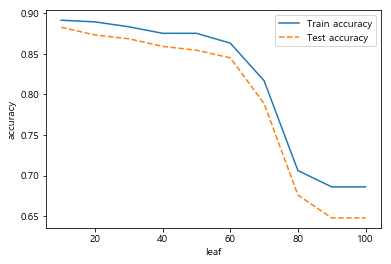

In [46]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=4,n_estimators=50,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf=30

In [47]:
rf_final=RandomForestClassifier(random_state=1234,n_estimators=50,\
                             min_samples_leaf=30 ,max_depth=4)
rf_final.fit(df_train_x,df_train_y)
y_pred=rf_final.predict(df_test_x)
print('accuracy on trainig set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))



accuracy on trainig set:0.883
accuracy on test set:0.869
confusion matrix:
[[138   0]
 [ 28  47]]


In [48]:
v_feature_names=df_train_x.columns
export_graphviz(rf_final.estimators_[0],out_file='rf_final_0.dot',class_names=['Good','Bad'],feature_names=v_feature_names,impurity=True,filled=True)
with open('rf_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#양품=0,good

UnicodeDecodeError: 'cp949' codec can't decode byte 0xb0 in position 610: illegal multibyte sequence

,feature,importance
10,ROLLING_TEMP_T5,0.266
9,FUR_EXTEMP,0.144
6,FUR_SZ_TEMP,0.060
2,PT_LTH,0.052
7,FUR_SZ_TIME,0.049
78,STEEL_KIND_C0,0.044
0,PT_THK,0.038
1,PT_WDTH,0.037
4,FUR_HZ_TEMP,0.036
5,FUR_HZ_TIME,0.028


Text(0,0.5,'변수')

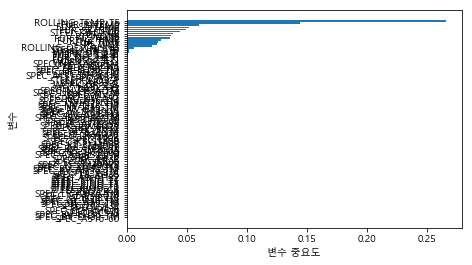

In [49]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=rf_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))

df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#변수 중요도 : ROLLING_TEMP_T5 ,FUR_EXTEMP,FUR_SZ_TEMP ,PT_LTH,FUR_SZ_TIME ,STEEL_KIND_C0,PT_THK,PT_WDTH 
#FUR_HZ_TEMP,FUR_HZ_TIME,FUR_TIME,PT_WGT ,ROLLING_DESCALING ,STEEL_KIND_T8,WORK_GR_3조,WORK_GR_2조,FUR_NO_3호기,
#FUR_NO_1호기